In [1]:
from GraphBasedDistanceMeasure import ScenarioGraph
from commonroad.common.file_reader import CommonRoadFileReader
import networkx as nx
import matplotlib.pyplot as plt

# generate path of the file to be opened
#file_path = "data_files/ZAM_Tutorial-1_1_T-1.xml"
#file_path2 = "data_files/ZAM_Tjunction-1_66_T-1.xml"
file_path = "data_files/CHN_Cho-2_1_T-1.xml"
file_path2 = "data_files/DEU_A9-1_1_T-1.xml"

# read in the scenario and planning problem set
crf = CommonRoadFileReader(file_path)
scenario, planning_problem_set = crf.open()

crf2 = CommonRoadFileReader(file_path2)
scenario2, planning_problem_set2 = crf2.open()

#for graph attributes
options1 = {
    'node_color': 'lightgreen',
    'node_size': 1000,
    'width': 1,
}

options2 = {
    'node_color': 'green',
    'node_size': 500,
    'width': 1,
}

plt.rcParams['figure.figsize'] = (20.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

#################################BRIEF USAGE###############################################
###########################################################################################
#############################GBDM Sample Usage ############################################
###########################################################################################
#Creata an ScenariGraph object
SG_1 = ScenarioGraph(scenario, planning_problem_set)
SG_2 = ScenarioGraph(scenario2, planning_problem_set2)
#SG_1.CreateLaneletGraph()  #you dont need to create graph. It created in constructer method

plt.subplot(1, 2, 1)
nx.draw(SG_1.scenario_graph,with_labels=True, font_weight='bold', **options1)
plt.subplot(1, 2, 2)
nx.draw(SG_2.scenario_graph,with_labels=True, font_weight='bold', **options2)
plt.show()

/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


<Figure size 2000x2000 with 2 Axes>

In [2]:
vehicle_objects = SG_1.vehicle_objects_dict

for vehicle_dict_id in vehicle_objects:
    print("vehicle object:  ", vehicle_objects[vehicle_dict_id])
    print("vehicle_info:    ", vehicle_objects[vehicle_dict_id].vehicle_info)
    
    #Initial_state usage
    print("**vehicle_info.initial_state:    ", (vehicle_objects[vehicle_dict_id].vehicle_info["initial_state"]))
    print("vehicle_initial_state:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state)
    print("vehicle_initial_state.velocity:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state.velocity)
    print("vehicle_initial_state.position:    ", vehicle_objects[vehicle_dict_id].vehicle_initial_state.position)
    
    
    print("vehicle_graph:   ", vehicle_objects[vehicle_dict_id].vehicle_graph)
    print("distance_sensor: ", vehicle_objects[vehicle_dict_id].distance_sensor)
    print("distance_sensor.vehicles_in_range: ", vehicle_objects[vehicle_dict_id].distance_sensor.vehicles_in_range)
    print("score_array:     ", vehicle_objects[vehicle_dict_id].score_dict)
    print("group_array:     ", vehicle_objects[vehicle_dict_id].group_array)
    print("knowledge_base:  ", vehicle_objects[vehicle_dict_id].knowledge_base)
    
    print("___________________________________________________________________________________________________")

vehicle object:   <Vehicle.Vehicle object at 0x7fe1f8be1ad0>
vehicle_info:     {'id': -1, 'initial_position': array([ 67.348 , 377.2854]), 'initial_state': <commonroad.scenario.trajectory.State object at 0x7fe1f6826b90>, 'initial_lanelet_id': 59, 'initial_lanelet_node': 0, 'planning_problem_id': 1}
**vehicle_info.initial_state:     
position= [ 67.348  377.2854]
orientation= -2.4137
velocity= 22.699
yaw_rate= 0.0
slip_angle= 0.0
time_step= 0

vehicle_initial_state:     
position= [ 67.348  377.2854]
orientation= -2.4137
velocity= 22.699
yaw_rate= 0.0
slip_angle= 0.0
time_step= 0

vehicle_initial_state.velocity:     22.699
vehicle_initial_state.position:     [ 67.348  377.2854]
vehicle_graph:    <GraphBasedDistanceMeasure.ScenarioGraph object at 0x7fe1f9151450>
distance_sensor:  <Sensor.DistanceSensor object at 0x7fe1f64311d0>
distance_sensor.vehicles_in_range:  [321, 323, 324, 326, 327]
score_array:      {321: 5.0, 327: 5.0, 323: 260.47362022216595, 324: 260.47362022216595, 326: 260.47

In [3]:
#find unique groups
from Visualization import VisualizationFunctions
visualization_function = VisualizationFunctions(SG_1)
print(visualization_function.group_ids)

for vehicle in SG_1.vehicle_objects_dict:
    print(vehicle, SG_1.vehicle_objects_dict[vehicle].group_array)

{-1: 1, 326: 1, 35: 2, 39: 3, 311: 4, 313: 5, 320: 5, 315: 6, 317: 7, 318: 8, 322: 8, 319: 9, 321: 10, 324: 10, 323: 11, 327: 12, 328: 13, 329: 14, 330: 14, 331: 15}
-1 [321, 327, 323, 324, 326, -1]
35 [311, 315, 35]
39 [311, 39]
311 [35, 39, 315, 311]
313 [318, 317, 320, 322, 313]
315 [35, 311, 317, 315]
317 [313, 315, 320, 317]
318 [313, 321, 320, 319, 322, 324, 318]
319 [318, 322, 323, 324, 321, 319]
320 [313, 317, 318, 322, 320]
321 [-1, 318, 319, 322, 324, 323, 326, 321]
322 [313, 318, 319, 320, 321, 324, 322]
323 [-1, 319, 321, 324, 326, 323]
324 [-1, 318, 319, 321, 322, 323, 326, 324]
326 [-1, 321, 323, 324, 327, 326]
327 [-1, 326, 328, 327]
328 [327, 329, 330, 328]
329 [328, 330, 331, 329]
330 [328, 329, 331, 330]
331 [329, 330, 331]


In [4]:
#best groups for each vehicle in the all groups
import numpy as np
all_groups = list()
for v_o in SG_1.vehicle_objects_dict:
    all_groups.append(SG_1.vehicle_objects_dict[v_o].group_array)
print(all_groups)

[[321, 327, 323, 324, 326, -1], [311, 315, 35], [311, 39], [35, 39, 315, 311], [318, 317, 320, 322, 313], [35, 311, 317, 315], [313, 315, 320, 317], [313, 321, 320, 319, 322, 324, 318], [318, 322, 323, 324, 321, 319], [313, 317, 318, 322, 320], [-1, 318, 319, 322, 324, 323, 326, 321], [313, 318, 319, 320, 321, 324, 322], [-1, 319, 321, 324, 326, 323], [-1, 318, 319, 321, 322, 323, 326, 324], [-1, 321, 323, 324, 327, 326], [-1, 326, 328, 327], [327, 329, 330, 328], [328, 330, 331, 329], [328, 329, 331, 330], [329, 330, 331]]


In [5]:
"""#after decisions of the vehicles the groups will established according to following function
#choose the best groups
ag = all_groups.copy()
best_groups = []
while ag:
    max_list = max(ag, key=len)
    if max_list != []:
        best_groups.append(max_list)
    max_list_index= ag.index(max_list)
    ag.pop(max_list_index)
    for group in ag:
        for vehicle_id in group:
            if vehicle_id in max_list:
                print("popped: ", vehicle_id)
                group.pop(group.index(vehicle_id))
                
print (best_groups)"""

'#after decisions of the vehicles the groups will established according to following function\n#choose the best groups\nag = all_groups.copy()\nbest_groups = []\nwhile ag:\n    max_list = max(ag, key=len)\n    if max_list != []:\n        best_groups.append(max_list)\n    max_list_index= ag.index(max_list)\n    ag.pop(max_list_index)\n    for group in ag:\n        for vehicle_id in group:\n            if vehicle_id in max_list:\n                print("popped: ", vehicle_id)\n                group.pop(group.index(vehicle_id))\n                \nprint (best_groups)'

In [6]:
all_groups

[[321, 327, 323, 324, 326, -1],
 [311, 315, 35],
 [311, 39],
 [35, 39, 315, 311],
 [318, 317, 320, 322, 313],
 [35, 311, 317, 315],
 [313, 315, 320, 317],
 [313, 321, 320, 319, 322, 324, 318],
 [318, 322, 323, 324, 321, 319],
 [313, 317, 318, 322, 320],
 [-1, 318, 319, 322, 324, 323, 326, 321],
 [313, 318, 319, 320, 321, 324, 322],
 [-1, 319, 321, 324, 326, 323],
 [-1, 318, 319, 321, 322, 323, 326, 324],
 [-1, 321, 323, 324, 327, 326],
 [-1, 326, 328, 327],
 [327, 329, 330, 328],
 [328, 330, 331, 329],
 [328, 329, 331, 330],
 [329, 330, 331]]

In [7]:
## groups after vehicles decision
group_count = max(visualization_function.group_ids.values())
groups_created_by_vehicles = []
for group in range(1,group_count+1):
    print(group)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [14]:
#take the groups results constracted after decisions of vehicles = gcbvd
#put them together in a list = all_groups
gcbvd = visualization_function.groups_created_by_vehicles_decision
print(gcbvd)
all_groups = []
for k in gcbvd:
    all_groups.append(gcbvd[k])
    
print(all_groups)

{1: [326, -1], 2: [35], 3: [39], 4: [311], 5: [320, 313], 6: [315], 7: [317], 8: [322, 318], 9: [319], 10: [324, 321], 11: [323], 12: [327], 13: [328], 14: [330, 329], 15: [331]}
[[326, -1], [35], [39], [311], [320, 313], [315], [317], [322, 318], [319], [324, 321], [323], [327], [328], [330, 329], [331]]


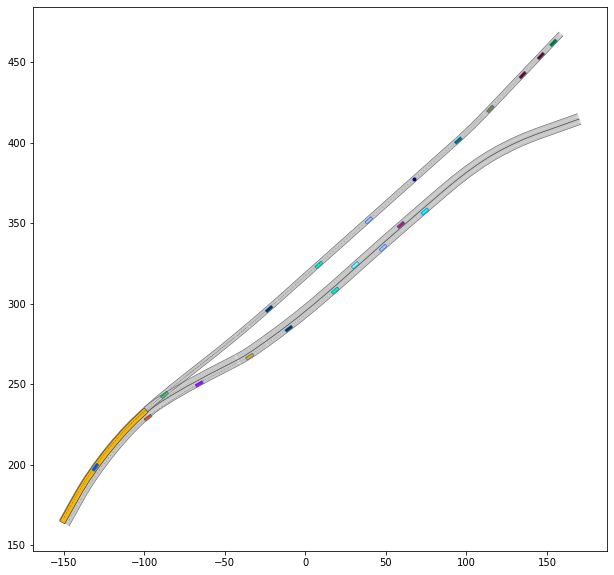

In [15]:
from Visualization import VisualizationFunctions
visualization_function = VisualizationFunctions(SG_1)
#print(visualization_function.group_ids)

import os
import matplotlib.pyplot as plt
from IPython import display
from brute_force import calculate_score
import commonroad.planning
# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object
import scenarios 
import matplotlib.patches as patches
from brute_force import Colorize_groups
import Convert_groups

groups=[]
# calculate_scores
grouparray= all_groups
print(all_groups)

for group in grouparray:
    groups.append(Convert_groups.conv_to_obj(scenario, planning_problem_set, group))

print(all_groups)
# plot the scenario for 40 time step, here each time step corresponds to 0.1 second
for i in range(0, 40):
    
    display.clear_output(wait=True)
    
    plt.figure(figsize=(20, 10))
    # plot the scenario at different time step   
    
    ax = plt.gca()
    
    draw_object(scenario.lanelet_network,draw_params={'time_begin': i}) #, plot_limits=plot_limits)
    time = i
    Colorize_groups.colorize_groups(groups, ax, time, visualization_function.group_ids)
    #raw_object(commonroad.planning.planning_problem.PlanningProblemSet.find_planning_problem_by_id(planning_problem_set, 2), draw_params=draw_params)
    #ect=patches.Rectangle((0,0),5,2,linewidth=1,edgecolor='#880000', facecolor='#998822')
    #x.add_patch(rect)
    # plot the planning problem set
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()
    break

In [22]:
list1 = [-1, 1, 2, 3]
list2 = [-1, 1, 2,]
x = all(elem in list1  for elem in list2)
print(x)

True
